In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# **Just a practice project , learning to use keras and how to make an ANN project , Hence no EDA is performed.**

In [3]:
data = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
fresh_data = data.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'])

In [11]:
fresh_data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3091,656,France,Male,37,2,0.00,2,0,1,67840.81,0
6249,705,France,Female,48,0,0.00,2,0,0,149772.61,0
5619,785,Spain,Male,41,7,0.00,2,1,1,199108.88,0
6481,606,Germany,Male,39,8,136000.45,2,1,0,31708.53,0
7405,556,France,Male,34,8,163757.06,1,1,1,104000.06,0


Performing one hot encoding for categorical values

In [12]:
new_data = pd.get_dummies(fresh_data , columns = ['Geography' , 'Gender'] , drop_first = True )
#deleted geography france and female , ther were the first..b
fresh_data = new_data.astype(int)
# 0 and 0 for geography means france.
# 0 for female in gender and 1 for male.

In [13]:
fresh_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


Train test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = fresh_data.drop('Exited' , axis = 1)
Y = fresh_data['Exited']

In [16]:
print(X)

      CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0             619   42       2        0              1          1   
1             608   41       1    83807              1          0   
2             502   42       8   159660              3          1   
3             699   39       1        0              2          0   
4             850   43       2   125510              1          1   
...           ...  ...     ...      ...            ...        ...   
9995          771   39       5        0              2          1   
9996          516   35      10    57369              1          1   
9997          709   36       7        0              1          0   
9998          772   42       3    75075              2          1   
9999          792   28       4   130142              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1           101348                  0                0   
1                

In [17]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [32]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=19)

Standardising the data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Importing ANN libraries namely Tenserflow,Keras

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

#first hidden  layer
model.add(Dense(3,activation='sigmoid',input_dim=11)) # 3 is number of neurons in hidden layer.
#output layer
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
#model compiling
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [51]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8653 - loss: 0.3429 - val_accuracy: 0.8619 - val_loss: 0.3461
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3351 - val_accuracy: 0.8606 - val_loss: 0.3465
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3473 - val_accuracy: 0.8600 - val_loss: 0.3470
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8494 - loss: 0.3602 - val_accuracy: 0.8600 - val_loss: 0.3471
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3447 - val_accuracy: 0.8606 - val_loss: 0.3473
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3663 - val_accuracy: 0.8594 - val_loss: 0.3474
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3552 - val_accuracy: 0.8594 - val_loss: 0.3475
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3529 - val_accu

In [57]:
model.layers[0].get_weights()

[array([[ 1.25693873e-01, -1.92677835e-03,  1.31682754e-01],
        [ 1.03771770e+00,  2.00040555e+00,  2.26187333e-01],
        [ 2.03057200e-01, -2.38573272e-02,  1.38259739e-01],
        [ 3.30215752e-01, -2.48806566e-01, -9.65798557e-01],
        [ 4.80953550e+00,  6.36036098e-01, -2.24710131e+00],
        [ 1.90389931e-01,  1.05408855e-01,  1.09944738e-01],
        [ 1.69147992e+00,  1.96940973e-01,  6.03490531e-01],
        [-5.59184998e-02, -9.10882950e-02, -7.83070028e-02],
        [-3.06707680e-01,  5.00471473e-01,  3.71258795e-01],
        [ 2.43872076e-01,  9.57236961e-02, -9.74655002e-02],
        [ 1.45398587e-01, -1.44503564e-01,  1.86200336e-01]], dtype=float32),
 array([ 1.4460995 , -0.18495123,  2.9453592 ], dtype=float32)]

In [58]:
model.layers[1].get_weights()

[array([[-4.2644525],
        [ 4.723393 ],
        [-4.454229 ]], dtype=float32),
 array([2.1265595], dtype=float32)]

In [59]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [60]:
y_pred = np.where(y_log>0.5,1,0)

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.8595

In [62]:
import matplotlib.pyplot as plt

In [52]:
history.history

{'accuracy': [0.8595312237739563,
  0.8590624928474426,
  0.8603125214576721,
  0.8596875071525574,
  0.8592187762260437,
  0.8595312237739563,
  0.8592187762260437,
  0.8598437309265137,
  0.8596875071525574,
  0.8600000143051147,
  0.859375,
  0.8592187762260437,
  0.8603125214576721,
  0.8584374785423279,
  0.8609374761581421,
  0.8595312237739563,
  0.8590624928474426,
  0.8592187762260437,
  0.8596875071525574,
  0.8595312237739563,
  0.8600000143051147,
  0.859375,
  0.8592187762260437,
  0.8600000143051147,
  0.8595312237739563,
  0.8595312237739563,
  0.8595312237739563,
  0.8592187762260437,
  0.8596875071525574,
  0.858593761920929,
  0.8587499856948853,
  0.8596875071525574,
  0.8573437333106995,
  0.8581249713897705,
  0.8587499856948853,
  0.8592187762260437,
  0.858593761920929,
  0.8587499856948853,
  0.8595312237739563,
  0.8584374785423279,
  0.8571875095367432,
  0.8584374785423279,
  0.8595312237739563,
  0.8584374785423279,
  0.858593761920929,
  0.8582812547683716,

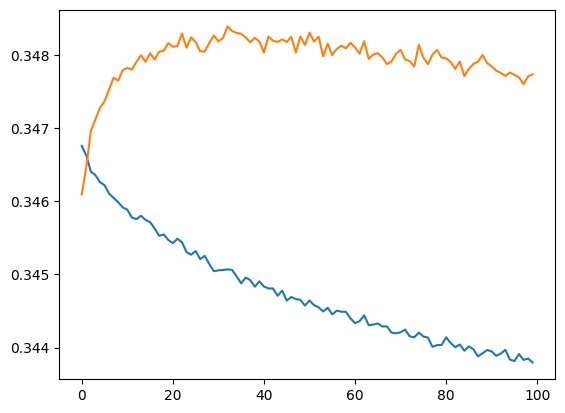

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

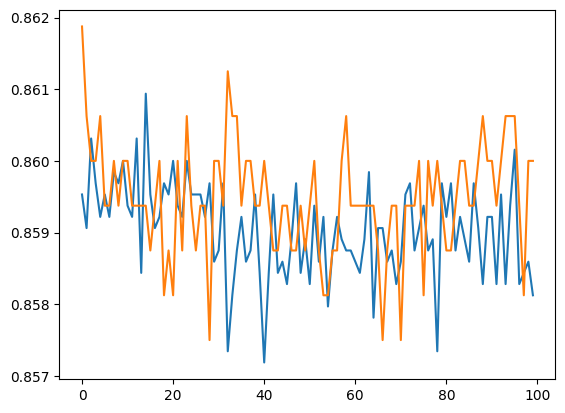

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])